In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotifyclassification/data.csv


In [3]:
df = pd.read_csv('/kaggle/input/spotifyclassification/data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [4]:
df.isnull().sum().sum()

0

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['artist'] = encoder.fit_transform(df['artist'])
df.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,628


In [6]:
correlation_matrix = df.corr()
print(correlation_matrix.target.sort_values(ascending=False))

target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
artist             -0.014588
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
Name: target, dtype: float64


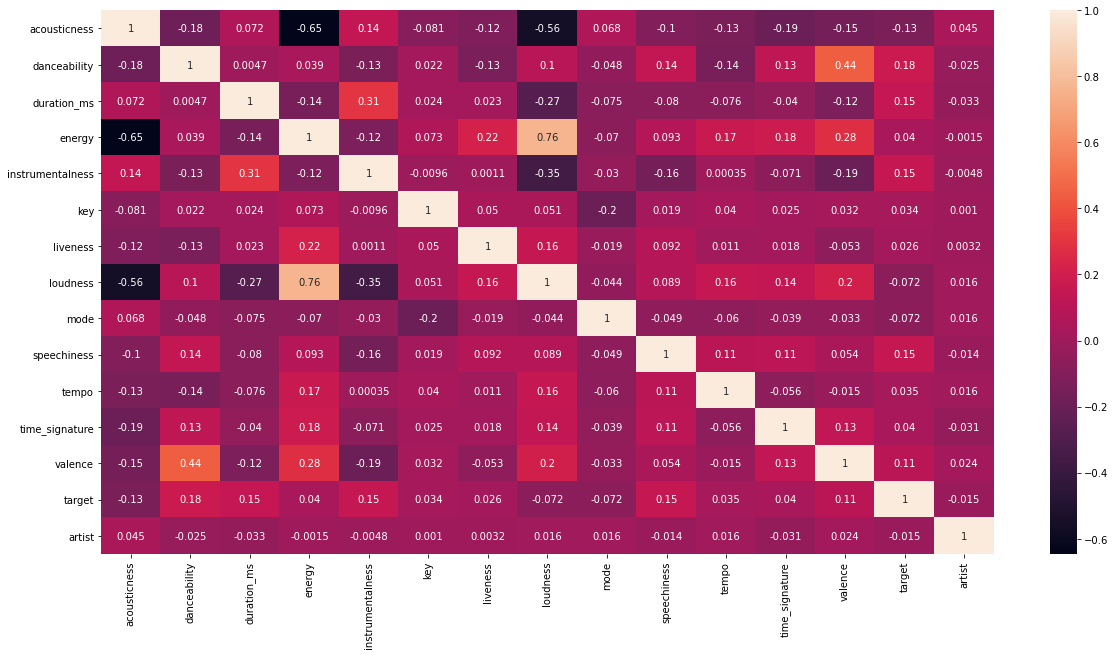

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'speechiness', 'instrumentalness', 'duration_ms', 'valence']

X = df[features].values
y = df['target'].values

X = StandardScaler().fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(1613, 5)
(1613,)


In [24]:
print(np.unique(y).sum())

1


In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(5, input_shape=(5,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
history = model.fit(X_train,y_train, verbose=1, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
51/51 [==============================] - 0s 4ms/step - loss: 0.8071 - accuracy: 0.4724 - val_loss: 0.7719 - val_accuracy: 0.4827
Epoch 2/20
51/51 [==============================] - 0s 2ms/step - loss: 0.7705 - accuracy: 0.4848 - val_loss: 0.7476 - val_accuracy: 0.4851
Epoch 3/20
51/51 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.5046 - val_loss: 0.7298 - val_accuracy: 0.5223
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.5307 - val_loss: 0.7172 - val_accuracy: 0.5520
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5524 - val_loss: 0.7075 - val_accuracy: 0.5569
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5666 - val_loss: 0.6998 - val_accuracy: 0.5817
Epoch 7/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5846 - val_loss: 0.6940 - val_accuracy: 0.6040
Epoch 8/20
51/51 [==

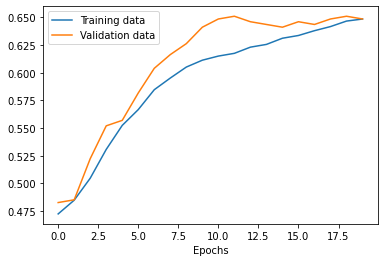

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'])

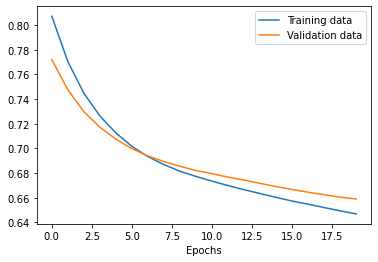

In [77]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'])